<a href="https://colab.research.google.com/github/afifahsuaib/Pemrograman_python/blob/main/Tugas11_Afifah%20Amatulla%20Suaib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
ls

 3scene@
'Afifah Amatulla Suaib-1101208446.pdf'
'Colab Notebooks'/
 dataset@
 datasett/
 nnmodel_scene/
 nnmodel_scene1/
 nnmodel_scene2/
'Quiz 2_Afifah Amatulla Suaib_1101208446.pdf'
'TugasProbstat_Afifah Amatulla Suaib_1101208446 (1).pdf'
'TugasProbstat_Afifah Amatulla Suaib_1101208446 (2).pdf'
'TugasProbstat_Afifah Amatulla Suaib_1101208446.pdf'


In [5]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [146]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("datasett")
data = []
labels = []

[INFO] loading images...


In [147]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [148]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [149]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [150]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [151]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(434, 64, 64, 3)
(145, 64, 64, 3)


In [240]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (5,5), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (5,5), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(250, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 60, 60, 8)         608       
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 26, 26, 16)        3216      
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_58 (Flatten)         (None, 2704)              0         
_________________________________________________________________
dense_111 (Dense)            (None, 250)               676250    
_________________________________________________________________
dense_112 (Dense)            (None, 5)               

In [100]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(5, activation = "softmax", name="layer4"),
    ]
)

In [101]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 5)                 85        
Total params: 1,230,873
Trainable params: 1,230,873
Non-trainable params: 0
_________________________________________________________________


In [241]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [242]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)

Epoch 1/30
14/14 [==============================] - 2s 108ms/step - loss: 1.6204 - accuracy: 0.2396 - val_loss: 1.5408 - val_accuracy: 0.3034
Epoch 2/30
14/14 [==============================] - 1s 100ms/step - loss: 1.4590 - accuracy: 0.3963 - val_loss: 1.2984 - val_accuracy: 0.5103
Epoch 3/30
14/14 [==============================] - 1s 100ms/step - loss: 1.1830 - accuracy: 0.5484 - val_loss: 1.1127 - val_accuracy: 0.5655
Epoch 4/30
14/14 [==============================] - 1s 100ms/step - loss: 0.9712 - accuracy: 0.6198 - val_loss: 0.9778 - val_accuracy: 0.6069
Epoch 5/30
14/14 [==============================] - 1s 100ms/step - loss: 0.8220 - accuracy: 0.6959 - val_loss: 0.9387 - val_accuracy: 0.6345
Epoch 6/30
14/14 [==============================] - 1s 99ms/step - loss: 0.6545 - accuracy: 0.7972 - val_loss: 0.8164 - val_accuracy: 0.6897
Epoch 7/30
14/14 [==============================] - 1s 101ms/step - loss: 0.6215 - accuracy: 0.7604 - val_loss: 0.8121 - val_accuracy: 0.7172
Epoch 8

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


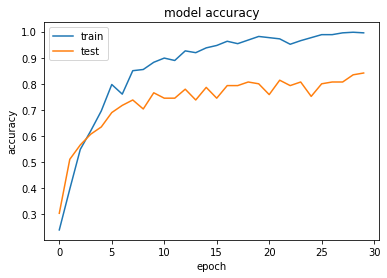

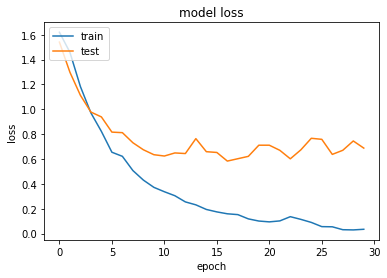

In [243]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [244]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.96      0.76      0.85        29
      GMB_02       0.73      0.92      0.81        24
      GMB_03       0.88      0.81      0.84        26
      GMB_07       0.79      0.96      0.87        28
      GMB_08       0.88      0.79      0.83        38

    accuracy                           0.84       145
   macro avg       0.85      0.85      0.84       145
weighted avg       0.85      0.84      0.84       145



In [245]:
model.save('nnmodel_daun')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_daun/assets


In [246]:
import cv2
import matplotlib.pyplot as plt
image1='daun_test.jpg'

In [258]:
sample='/content/drive/MyDrive/datasett/GMB_02/IMG_20200815_203353.jpg'

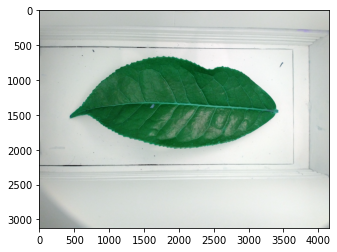

In [259]:
img_array = cv2.imread(sample)
plt.imshow(img_array)
plt.show()

In [260]:
image_testing = Image.open('/content/drive/MyDrive/datasett/GMB_02/IMG_20200815_203353.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [261]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [262]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.27878997 0.17547178 0.14441419 0.20492738 0.19639666]]
['GMB_01']
